<a href="https://colab.research.google.com/github/gabrielbaltazarmw2/Processamento-Digital-de-Sinais-em-Python/blob/main/01_dominio_da_frequencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Onda Senoidal:

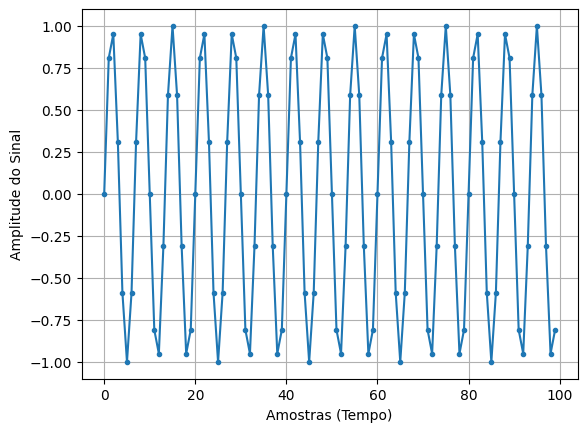

In [12]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(100)  # tempo 0-99, equivale tbm a fs --> 1 amostra por segundo
f = 0.15            # frequencia em HZ
s = np.sin(f*2*np.pi*t)

plt.plot(t,s,'.-')
plt.xlabel("Amostras (Tempo)");
plt.ylabel("Amplitude do Sinal");
plt.grid()

#Função FFT:

In [13]:
S = np.fft.fft(s)

In [14]:
S

array([ 5.38968388e-15+0.00000000e+00j, -1.55941444e-15-2.22044605e-15j,
        1.45864015e-14+2.78762434e-15j, -1.78241818e-14+3.88578059e-15j,
        6.83917301e-15-2.11070206e-17j, -5.36670238e-16+0.00000000e+00j,
        5.71927957e-15-2.20211122e-15j,  1.75351994e-14+8.54585802e-15j,
       -1.04213601e-14+1.19105191e-14j, -2.66989200e-14-1.84122952e-14j,
        5.99794329e-15+3.46035242e-15j,  2.90670110e-14-1.62975202e-14j,
        9.99886497e-15+1.42128161e-14j,  2.77047973e-15+1.26706965e-14j,
        1.37297060e-14+2.66857037e-14j, -8.44092504e-14-5.00000000e+01j,
       -5.15143689e-15-2.36243013e-14j,  1.47063314e-15-2.72457207e-14j,
        1.10303868e-14-1.56776819e-14j,  1.38233919e-14-1.64246700e-15j,
        9.73411865e-15-5.19843387e-15j,  3.63128054e-15+9.21734639e-16j,
        2.67907076e-14+1.61347636e-14j, -1.99466829e-14+1.65968830e-14j,
       -7.34552066e-15-4.46477170e-16j, -8.63965975e-15-1.06581410e-14j,
        1.48780513e-14-2.04288559e-15j, -9.63667647

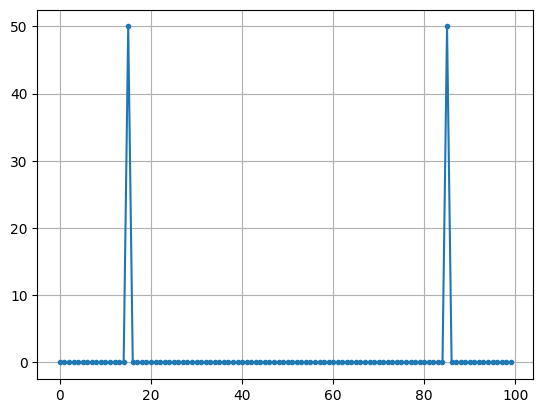

In [20]:
S_mag = np.abs(S)
S_fase = np.angle(S)
plt.plot(t,S_mag, '.-')
plt.grid()

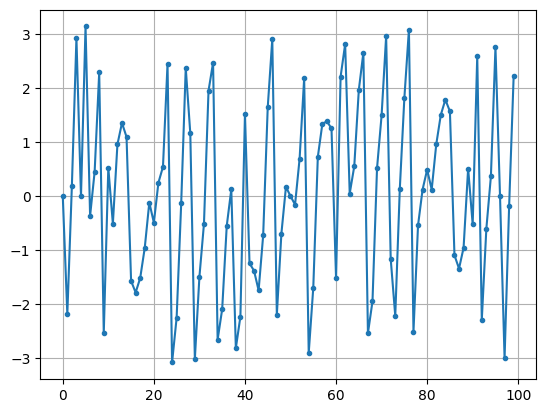

In [21]:
plt.plot(t,S_fase, '.-')
plt.grid()

Precisamos ajustar o formato da saída do eixo x da FFT para ficar no padrão mais comum:

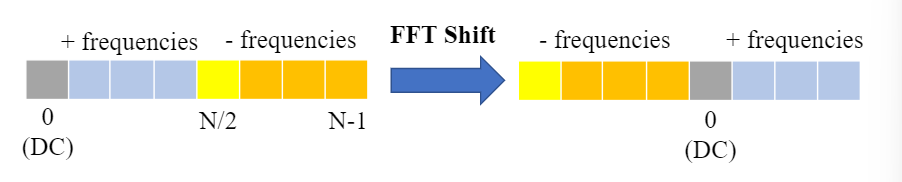

In [22]:
S = np.fft.fftshift(np.fft.fft(s))

Precisamos ajustar os valores do eixo x, que ira de -0.5 até +0.5 Hz:

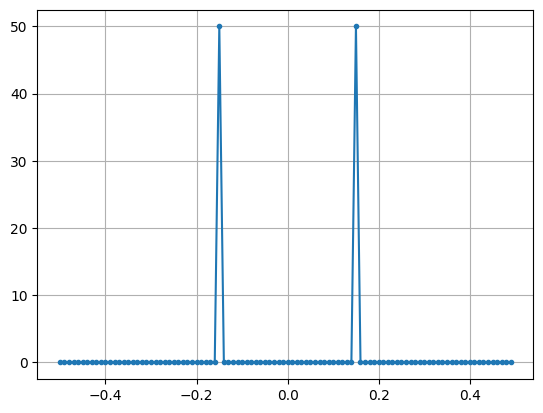

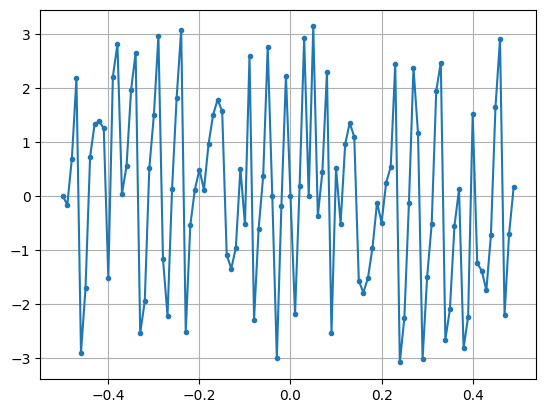

In [26]:
Fs = 1            # Hz
N = 100           # numero de amostras e tamanho da FFT

t = np.arange(N)  # pois nossa taxa de amostragem é de 1 Hz
s = np.sin(0.15*2*np.pi*t)
S = np.fft.fftshift(np.fft.fft(s))
S_mag = np.abs(S)
S_phase = np.angle(S)
f = np.arange(Fs/-2, Fs/2, Fs/N)
plt.figure(0)
plt.plot(f, S_mag,'.-')
plt.grid()
plt.figure(1)
plt.plot(f, S_phase,'.-')
plt.grid()
plt.show()


#Janelamento:

In [29]:
janela = np.hamming(100)

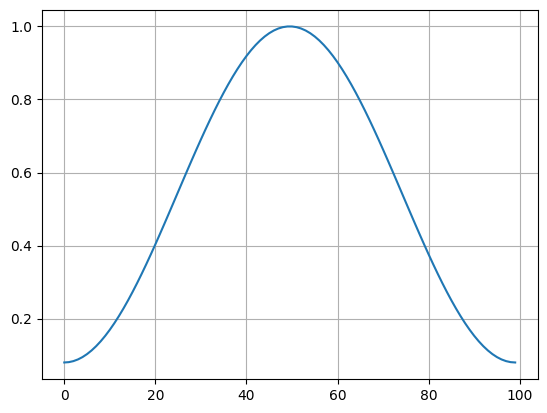

In [30]:
plt.plot(janela)
plt.grid()

In [33]:
s = s*janela

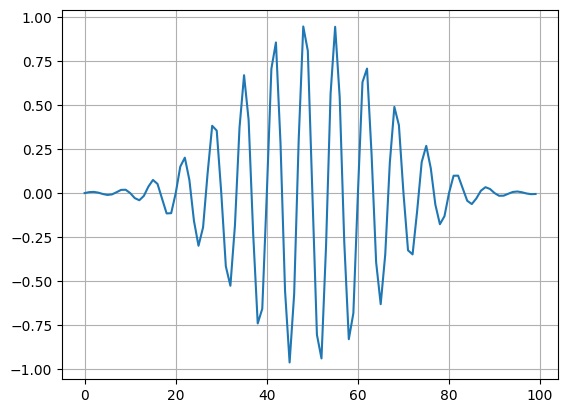

In [35]:
plt.plot(s)
plt.grid()

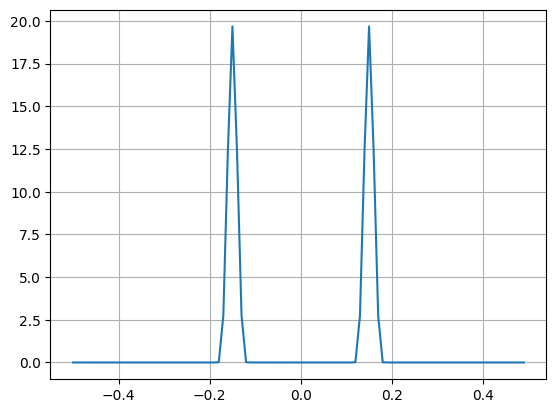

In [37]:
S = np.fft.fftshift(np.fft.fft(s))
S_mag = np.abs(S)

plt.plot(f, S_mag)
plt.grid()

#Espectrograma:

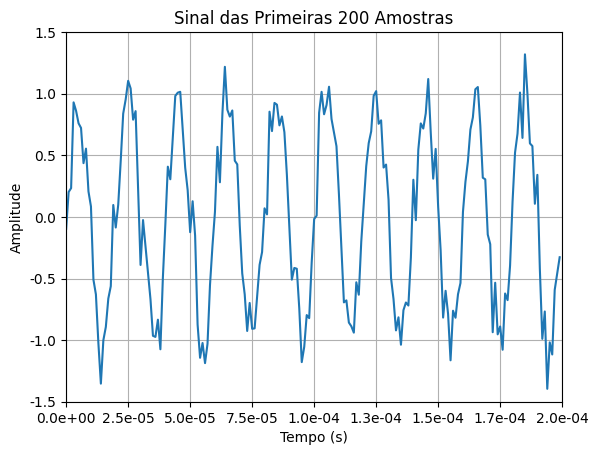

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

sample_rate = 1e6

# Generate tone plus noise
t = np.arange(1024*1000)/sample_rate # time vector
f = 50e3 # freq of tone
x = np.sin(2*np.pi*f*t) + 0.2*np.random.randn(len(t))

# Plot das primeiras 200 amostras
plt.plot(t[:200], x[:200])
plt.axis([0, t[200], -1.5, 1.5])  # [xmin, xmax, ymin, ymax]
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal das Primeiras 200 Amostras')

# Formatar os valores dos eixos x e y
def format_x_ticks(x, _):
    return f'{x:.1e}'  # Formato científico com 2 casas decimais

def format_y_ticks(y, _):
    return f'{y:.1f}'  # Uma casa decimal

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_ticks))

plt.grid(True)
plt.show()

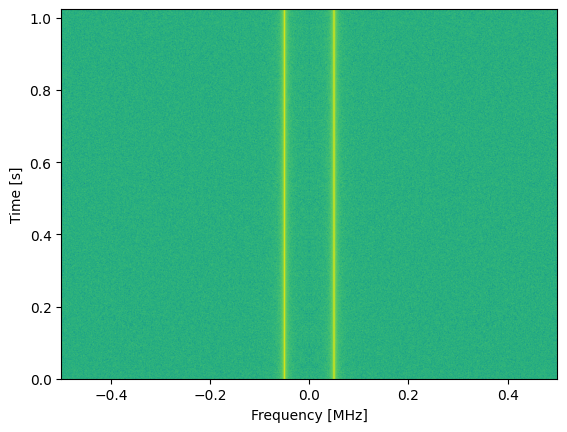

In [50]:
# simulate the signal above, or use your own signal

fft_size = 1024
num_rows = len(x) // fft_size # // is an integer division which rounds down
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)

plt.imshow(spectrogram, aspect='auto', extent = [sample_rate/-2/1e6, sample_rate/2/1e6, 0, len(x)/sample_rate])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]")
plt.show()

#Implementando a FFT

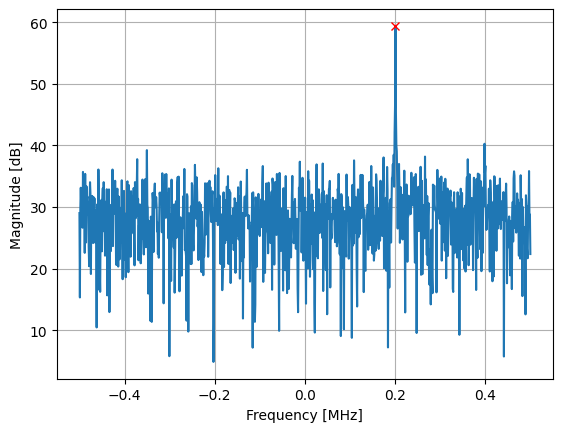

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def fft(x):
    N = len(x)
    if N == 1:
        return x
    twiddle_factors = np.exp(-2j * np.pi * np.arange(N//2) / N)
    x_even = fft(x[::2]) # yay recursion!
    x_odd = fft(x[1::2])
    return np.concatenate([x_even + twiddle_factors * x_odd,
                           x_even - twiddle_factors * x_odd])

# Simulate a tone + noise
sample_rate = 1e6
f_offset = 0.2e6 # 200 kHz offset from carrier
N = 1024
t = np.arange(N)/sample_rate
s = np.exp(2j*np.pi*f_offset*t)
n = (np.random.randn(N) + 1j*np.random.randn(N))/np.sqrt(2) # unity complex noise
r = s + n # 0 dB SNR

# Perform fft, fftshift, convert to dB
X = fft(r)
X_shifted = np.roll(X, N//2) # equivalent to np.fft.fftshift
X_mag = 10*np.log10(np.abs(X_shifted)**2)

# Plot results
f = np.linspace(sample_rate/-2, sample_rate/2, N)/1e6 # plt in MHz
plt.plot(f, X_mag)
plt.plot(f[np.argmax(X_mag)], np.max(X_mag), 'rx') # show max
plt.grid()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Magnitude [dB]')
plt.show()